In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [6]:
df = pd.read_csv('customers_case.csv', parse_dates=['statusUpdatedAt', 'activation date', 'end portability date'])
print(df)
df["age"] = [(int(i)) if i.isnumeric() else -1 for i in df["age"]]

                               uid     gender    status statusUpdatedAt  \
0     00AJmuB7JTe5qJJuG99sLHthmVX2  masculino    paused      2021-02-14   
1     011nhqQ4gyMCNfwLdjjXaRPo5PF3  masculino    active      2021-03-03   
2     01zSzL2oaLYLVlsHeHFyiVyyvf82  masculino  canceled      2021-02-21   
3     027onaL5DKXWigqGc4ZOiBniTJC2   feminino    active      2021-03-03   
4     02DozqKFn1RmId9AKn0xPumtb8L2   feminino    active      2021-02-16   
...                            ...        ...       ...             ...   
5125  zyfDr6lTjbcFcU2mlypXQGsM1L22  masculino  canceled      2020-08-18   
5126  zyzQJ3ozO1bx8Hl4qDBj9tnMPEj2  masculino    paused      2021-01-15   
5127  zzWGvniSA7cqpHxqYAJKkygHv9r1   feminino    active      2021-02-25   
5128  zzYJppnOl2aSIiDNdbo6iCrN9i13  masculino  canceled      2020-12-18   
5129  zzrXnFKegVO120TFyFT4v9b2Y8J3  masculino    active      2021-03-03   

                 statusPrevious age  areaCode state recurrence  \
0     paymentFailedSubscription  

In [7]:
#from bokeh.charts import output_file, Chord
#from bokeh.io import show
#from bokeh.sampledata.les_mis import data

df_status = df.groupby(by=['statusPrevious', 'status'], as_index=False).count()

df_status = df_status.pivot(index='statusPrevious', columns='status', values='uid').fillna(0)



Text(0, 0.5, 'Frequency')

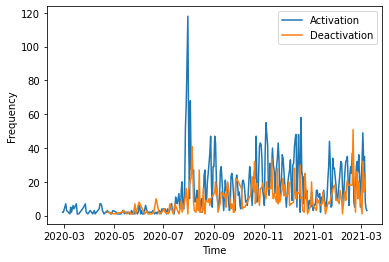

In [8]:
df_active = df.groupby(by=['activation date'], as_index=False).count()
df_deactive = df.groupby(by=['end portability date'], as_index=False).count()
sns.lineplot(x='activation date', y='uid', data = df_active, label="Activation")
sns.lineplot(x='end portability date', y='uid', data = df_deactive, label ="Deactivation")
plt.xlabel("Time")
plt.ylabel("Frequency")


In [16]:
import statsmodels.api as sm

min_date = min(df_active['activation date'])
x = [(i - min_date).days for i in df_active['activation date']]
y = df_active['uid'].to_numpy()
olsmod = sm.OLS(y, x)
olsres = olsmod.fit()

[0, 1, 4, 5, 7, 9, 10, 11, 13, 14, 17, 18, 19, 20, 26, 27, 28, 29, 31, 34, 37, 39, 40, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 58, 59, 60, 62, 66, 67, 72, 73, 74, 75, 76, 78, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 102, 103, 104, 105, 110, 111, 112, 113, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259,

In [23]:
xpred = list(range(max(x), max(x) + 30))
ypred = olsres.predict(xpred)

'''
x = x + xpred
y = y + ypred
print(x)
print(y)
'''

'''
sns.lineplot(x='activation date', y='uid', data = df_active, label="Activation")
sns.lineplot(x='end portability date', y='uid', data = df_deactive, label ="Deactivation")
plt.plot(xpred, ypred, label="Predicted Activation")
plt.xlabel("Time")
plt.ylabel("Frequency")
'''

ValueError: operands could not be broadcast together with shapes (328,) (30,) 

Text(0.5, 1.0, "Fluke's user profile")

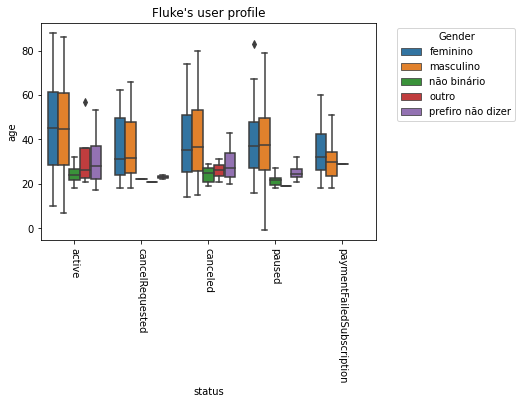

In [3]:
df_status = df.groupby(by=["status", "gender", "age"], as_index=False).count().dropna()
sns.boxplot(
    data=df_status,x="status", y="age", hue="gender"
)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=270)
plt.title("Fluke's user profile")

Text(0.5, 1.0, 'Scatterplot between cellphone desity and Fluke clients')

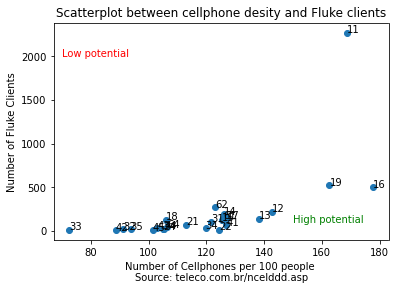

In [4]:
def convert_to_int(df_temp, cols):
    for col in cols:
        df_temp[col] = [(int(i)) if i.isnumeric() else 0 for i in df_temp[col]]
    return df_temp

import matplotlib.pyplot as plt
df_cel = pd.read_csv("celulares_ddd_dados.csv")
df_cel.index = df_cel["cod_area"]
df_temp = df.groupby(by=["areaCode"]).count()

x = []
y = []
n = []
for i in df_temp.index:
    if i in df_cel.cod_area:
        x.append(df_cel.loc[i, 'densidade'])
        y.append(df_temp.loc[i, 'uid'])
        n.append(i)
        

fig, ax = plt.subplots()
ax.scatter(x, y)
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.xlabel("Number of Cellphones per 100 people \nSource: teleco.com.br/ncelddd.asp")
plt.ylabel("Number of Fluke Clients")
plt.text(70, 2000, "Low potential", color="red")
plt.text(150, 100, "High potential", color="green")
plt.title("Scatterplot between cellphone desity and Fluke clients")
#df_cel_groupped = convert_to_int(df_cel_groupped, ["uid"])

Text(0.5, 1.0, 'Swarmplot of Fluke data package')

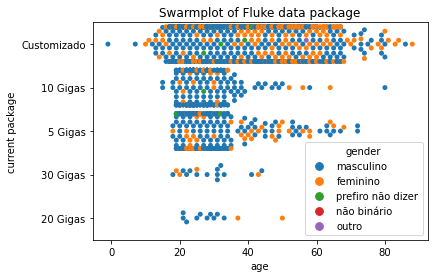

In [5]:
#df_package = df.groupby(by=["currentPackage", "age"])
package_dict = {"customPackage":"Customizado", "madePackage-0":"5 Gigas", "madePackage-1":"10 Gigas", "madePackage-2":"20 Gigas", "madePackage-3":"30 Gigas"}
df["current package"] = [package_dict[i] for i in df["current package"]]
sns.swarmplot(data=df, x="age", y="current package", hue="gender")
plt.title("Swarmplot of Fluke data package")

In [4]:
df = pd.read_csv('order_case.csv')

NameError: name 'pd' is not defined

In [6]:
import plotly.express as px
import json
from urllib.request import urlopen

with urlopen('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson') as response:
    Brazil = json.load(response) # Javascrip object notation 

state_id_map = {}
for feature in Brazil ['features']:
    feature['id’'] = feature['properties']['name']
    state_id_map[feature['properties']['sigla']] = feature['id']
df_states = df.groupby(by=["state"], as_index=False).count()

fig = px.choropleth(
    df_states, #soybean database
    locations = "state", #define the limits on the map/geography
    geojson = Brazil, #shape information
    color = "uid", #defining the color of the scale through the database
    hover_name = "state", #the information in the box
    hover_data =["uid"],
    title = "Clients by state", #title of the map
)

ModuleNotFoundError: No module named 'plotly'